In [1]:
import os

os.chdir(os.path.dirname(os.getcwd()))

In [2]:
import libs.local
import matplotlib.pyplot
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import xarray

In [3]:
experiment = 'ssp585'
key = 'Ensemble mean'
seasons = ['DJF', 'MAM', 'JJA', 'SON']
region = 'Central'
si_var = 'simass'

kwargs = {
    'experiment': experiment,
    'region': region,
    'suffix': '_delta_1980-2010'
}
si_data = libs.local.get_ensemble_series(si_var, **kwargs)[key]
tas = libs.local.get_ensemble_series('tas', **kwargs)[key]
evspsbl = libs.local.get_ensemble_series('evspsbl', **kwargs)[key]
pr = libs.local.get_ensemble_series('pr', **kwargs)[key]
prra = libs.local.get_ensemble_series('prra', **kwargs)[key]
prsn = libs.local.get_ensemble_series('prsn', **kwargs)[key]


def filter_season_plot(period, siconc, tas, pr, prra, prsn, title=''):
    siconc = siconc.where(siconc.time['time.season'] == period)
    tas = tas.where(tas.time['time.season'] == period)
    pr = pr.where(pr.time['time.season'] == period)
    prra = prra.where(prra.time['time.season'] == period)
    prsn = prsn.where(prsn.time['time.season'] == period)
    
    plot(siconc, tas, pr, prra, prsn, title)

    
def plot(siconc, tas, pr, prra, prsn, title=''):
    fig, axs = matplotlib.pyplot.subplots(2, 5, figsize=(12,6))
    axs = axs.flatten()
    axs[0].scatter(siconc, tas); axs[0].set_xlabel(si_var); axs[0].set_ylabel('tas')
    axs[1].scatter(siconc, prsn); axs[1].set_xlabel(si_var); axs[1].set_ylabel('prsn')
    axs[2].scatter(siconc, prra); axs[2].set_xlabel(si_var); axs[2].set_ylabel('prra')
    axs[3].scatter(siconc, pr); axs[3].set_xlabel(si_var); axs[3].set_ylabel('pr')
    axs[4].scatter(siconc, evspsbl); axs[4].set_xlabel(si_var); axs[4].set_ylabel('evspsbl')

    axs[6].scatter(tas, prsn); axs[6].set_xlabel('tas'); axs[6].set_ylabel('prsn')
    axs[7].scatter(tas, prra); axs[7].set_xlabel('tas'); axs[7].set_ylabel('prra')
    axs[8].scatter(tas, pr); axs[8].set_xlabel('tas'); axs[8].set_ylabel('pr')
    axs[9].scatter(tas, evspsbl); axs[9].set_xlabel('tas'); axs[9].set_ylabel('evspsbl')

    fig.suptitle(title)
    fig.tight_layout()


'''tas_abs = libs.local.get_ensemble_series('tas', **kwargs)[key]
mask = tas_abs > 0
siconc = siconc.where(mask)
tas = tas.where(mask)
pr = pr.where(mask)
prra = prra.where(mask)
prsn = prsn.where(mask)''';

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 simass   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1141.
Date:                Mon, 30 May 2022   Prob (F-statistic):          2.14e-298
Time:                        09:15:54   Log-Likelihood:                -53384.
No. Observations:                1452   AIC:                         1.068e+05
Df Residuals:                    1449   BIC:                         1.068e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.662e+15   8.16e+13    -32.641      0.000   -2.82e+15    -2.5e+15
tas         -2.43e+14   7.67e+12    -31.696      0.000   -2.58e+14   -2.28e+14
prra        -4.06e+15    1.8e+14    -22.552      0.000   -4.41e+15   -3.71e+15
==============================================================================
Omnibus:                      327.908   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.393
Skew:                           0.201   Prob(JB):                     5.18e-16
Kurtosis:                       1.999   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

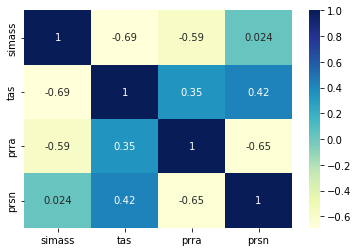

In [4]:
data = pd.DataFrame({
    (si_var): si_data.data,
    'tas': tas.data,
    'prra': prra.data,
    'prsn': prsn.data
})
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

model = smf.ols(formula=f'{si_var} ~ tas + prra', data=data).fit()
model.summary()

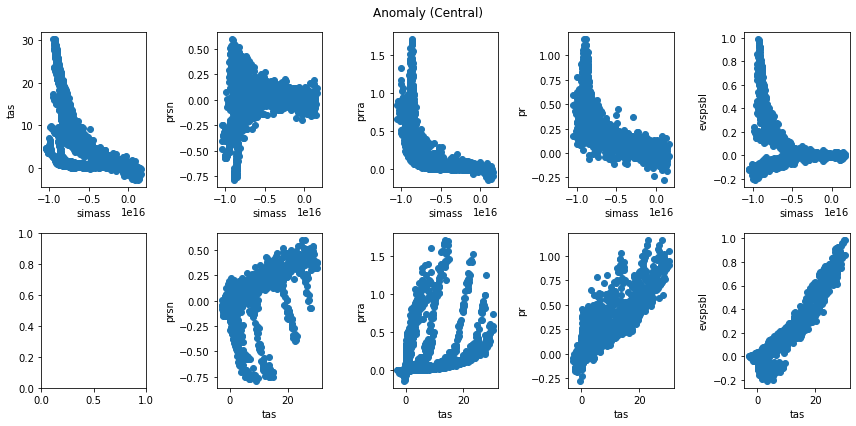

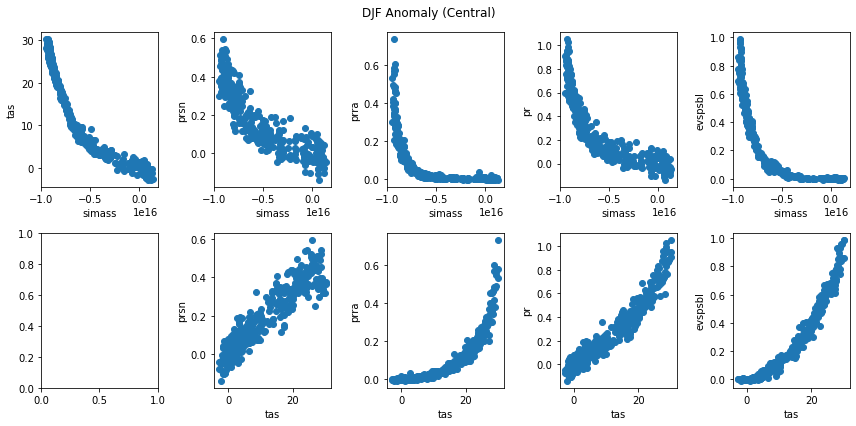

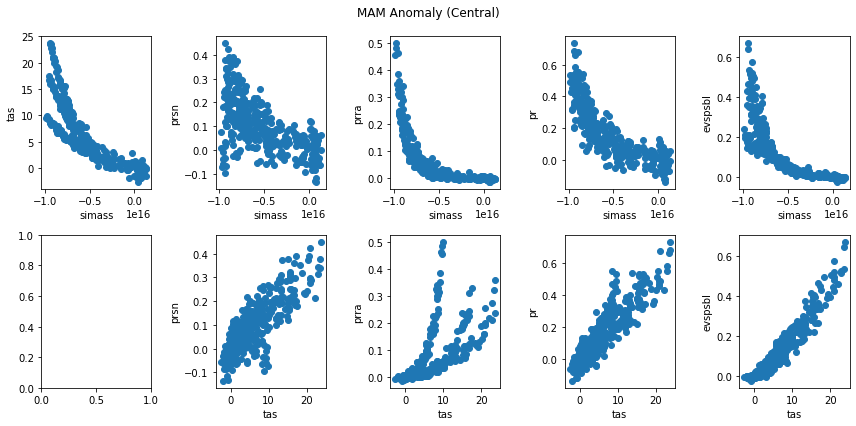

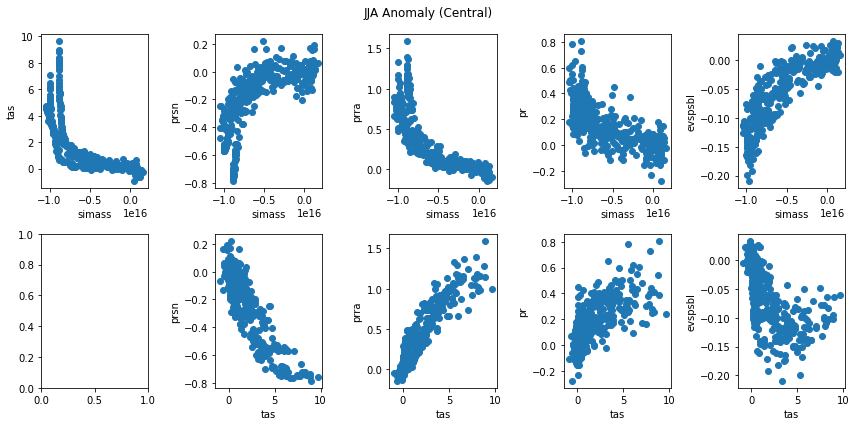

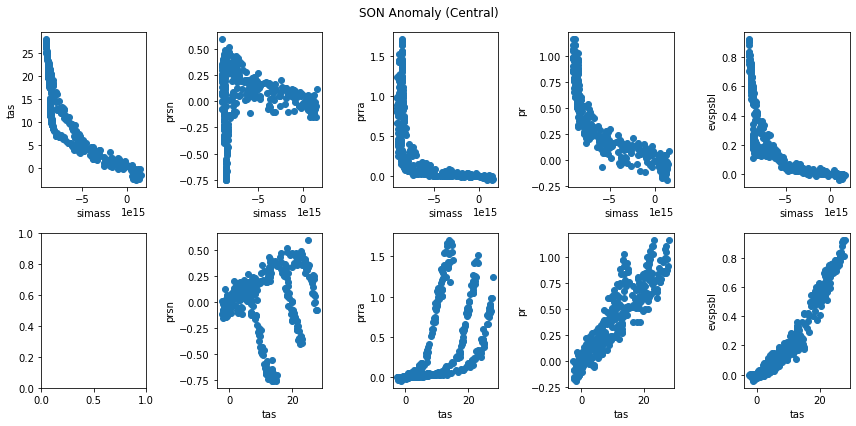

In [5]:
plot(si_data, tas, pr, prra, prsn, title=f'Anomaly ({region})')

[filter_season_plot(s, si_data, tas, pr, prra, prsn, title=f'{s} Anomaly ({region})') for s in seasons];

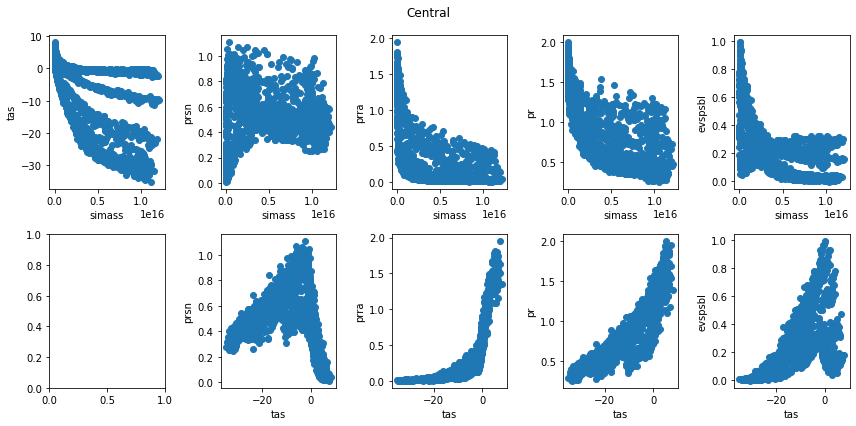

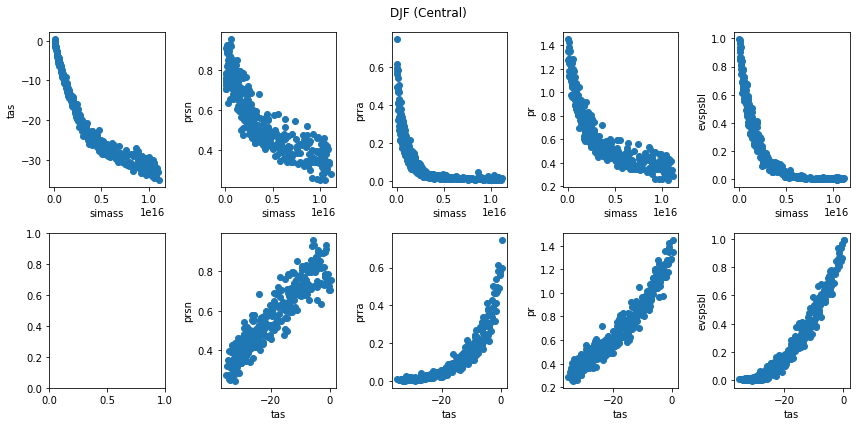

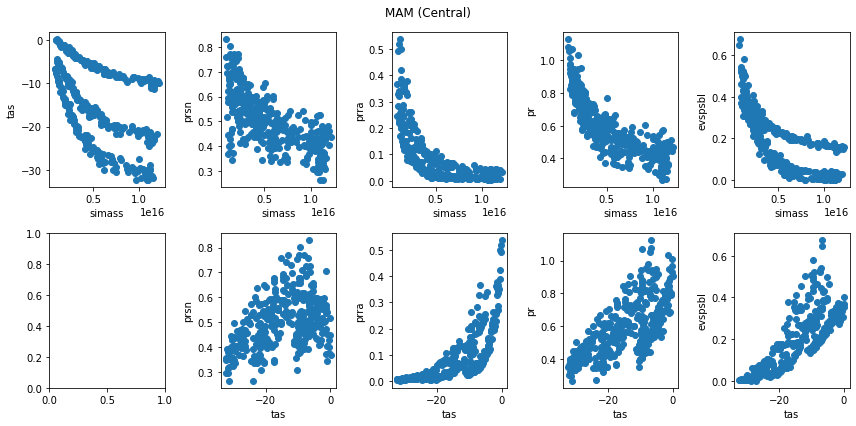

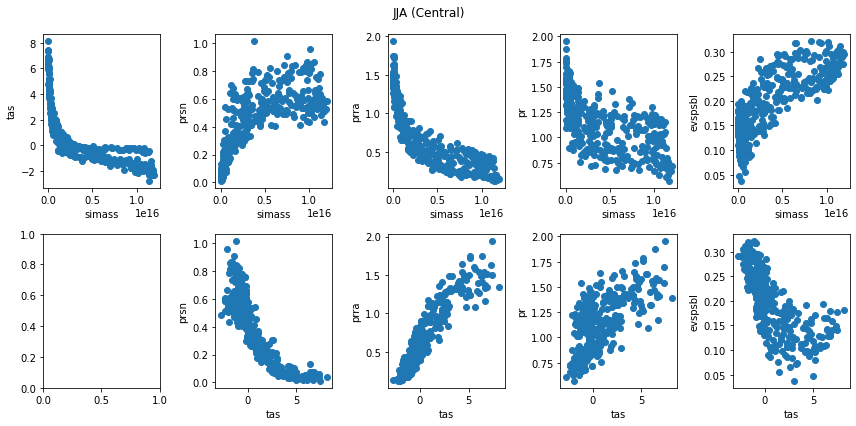

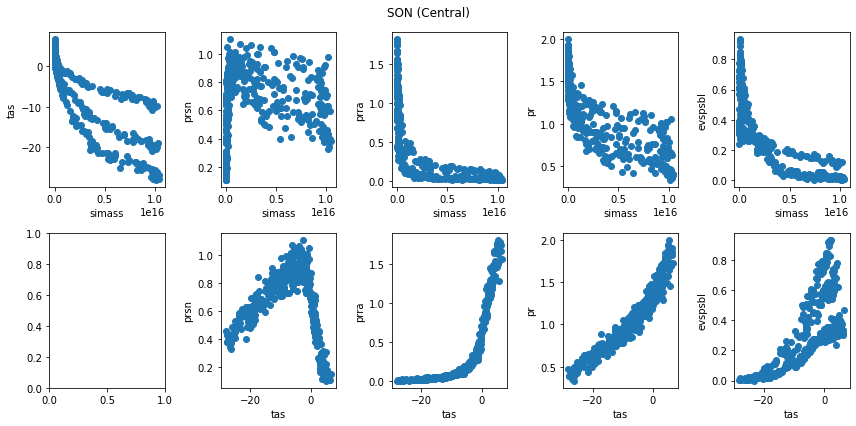

In [6]:
kwargs = {
    'experiment': experiment,
    'region': region,
    'suffix': ''
}
si_data = libs.local.get_ensemble_series(si_var, **kwargs)[key]
tas = libs.local.get_ensemble_series('tas', **kwargs)[key]
evspsbl = libs.local.get_ensemble_series('evspsbl', **kwargs)[key]
pr = libs.local.get_ensemble_series('pr', **kwargs)[key]
prra = libs.local.get_ensemble_series('prra', **kwargs)[key]
prsn = libs.local.get_ensemble_series('prsn', **kwargs)[key]

plot(si_data, tas, pr, prra, prsn, title=region)

[filter_season_plot(s, si_data, tas, pr, prra, prsn, title=f'{s} ({region})') for s in seasons];

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 simass   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     389.0
Date:                Mon, 30 May 2022   Prob (F-statistic):          5.97e-136
Time:                        09:16:06   Log-Likelihood:                -53805.
No. Observations:                1452   AIC:                         1.076e+05
Df Residuals:                    1449   BIC:                         1.076e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.323e+15   1.97e+14     21.924      0.000    3.94e+15    4.71e+15
tas        -9.947e+13   1.01e+13     -9.867      0.000   -1.19e+14   -7.97e+13
prra       -2.965e+15   2.76e+14    -10.732      0.000   -3.51e+15   -2.42e+15
==============================================================================
Omnibus:                      106.477   Durbin-Watson:                   0.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.513
Skew:                           0.695   Prob(JB):                     1.51e-27
Kurtosis:                       2.670   Cond. No.                         64.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

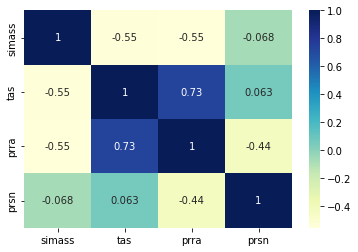

In [7]:
data = pd.DataFrame({
    (si_var): si_data.data,
    'tas': tas.data,
    'prra': prra.data,
    'prsn': prsn.data
})

sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

model = smf.ols(formula=f'{si_var} ~ tas + prra', data=data).fit()
model.summary()

In [8]:
model = smf.ols(formula=f'{si_var} ~ tas + prra + prsn', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 simass   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     355.4
Date:                Mon, 30 May 2022   Prob (F-statistic):          6.44e-173
Time:                        09:16:06   Log-Likelihood:                -53717.
No. Observations:                1452   AIC:                         1.074e+05
Df Residuals:                    1448   BIC:                         1.075e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.015e+16   4.64e+14     21.884      0.000    9.24e+15    1.11e+16
tas         2.372e+12   1.21e+13      0.197      0.844   -2.13e+13     2.6e+13
prra       -6.503e+15   3.66e+14    -17.749      0.000   -7.22e+15   -5.78e+15
prsn       -6.741e+15   4.92e+14    -13.706      0.000   -7.71e+15   -5.78e+15
==============================================================================
Omnibus:                      120.589   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.129
Skew:                           0.783   Prob(JB):                     2.51e-33
Kurtosis:                       2.825   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""